https://r4ds.had.co.nz/

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


`ggplot2::ggplot()` tells us that we explicitely are using the `ggplot()` frunction from the `ggplot2` package

## The Question

__Do cars with big engines use more fuel than cars with small engines__

In [8]:
str(mpg)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	234 obs. of  11 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...


In [7]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


summarize only numerical values

In [18]:
summary(dplyr::select_if(mpg, is.numeric))

     displ            year           cyl             cty             hwy       
 Min.   :1.600   Min.   :1999   Min.   :4.000   Min.   : 9.00   Min.   :12.00  
 1st Qu.:2.400   1st Qu.:1999   1st Qu.:4.000   1st Qu.:14.00   1st Qu.:18.00  
 Median :3.300   Median :2004   Median :6.000   Median :17.00   Median :24.00  
 Mean   :3.472   Mean   :2004   Mean   :5.889   Mean   :16.86   Mean   :23.44  
 3rd Qu.:4.600   3rd Qu.:2008   3rd Qu.:8.000   3rd Qu.:19.00   3rd Qu.:27.00  
 Max.   :7.000   Max.   :2008   Max.   :8.000   Max.   :35.00   Max.   :44.00  

## Data Visualizations

https://r4ds.had.co.nz/data-visualisation.html

create a gg plot of to key variables `displ` _(car engine size, in liters)_ and _(car's fuel efficency on the highway when they travel the same distance)_

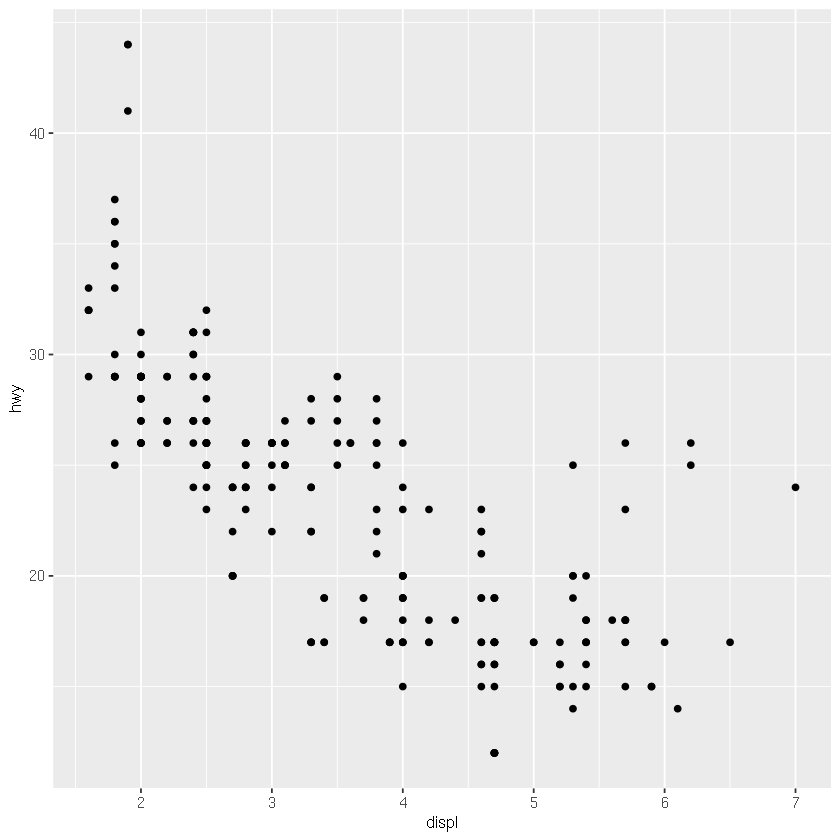

In [21]:
ggplot(data = mpg) + 
geom_point(mapping = aes(x = displ, y = hwy))

In this plot we can see a _negative_ relationship between the engine size `displ` and the car's fuel effenciency `hwy`. Therefore, the bigger the engine it appears the lower the car's fuel effenciey, which suggest that more the engine uses of fuel. 

it appears we have a cluster of 6 values in the mid-right section of the plot between displ (5, 7) and hwy (22, 25), Lets see if we can find a solution to this _hypothesis:_
        
        These cars are hybrids

For the soluton we can utilze the `class` variable that classifies cars into groups such as compact, midsize, and SUV. 

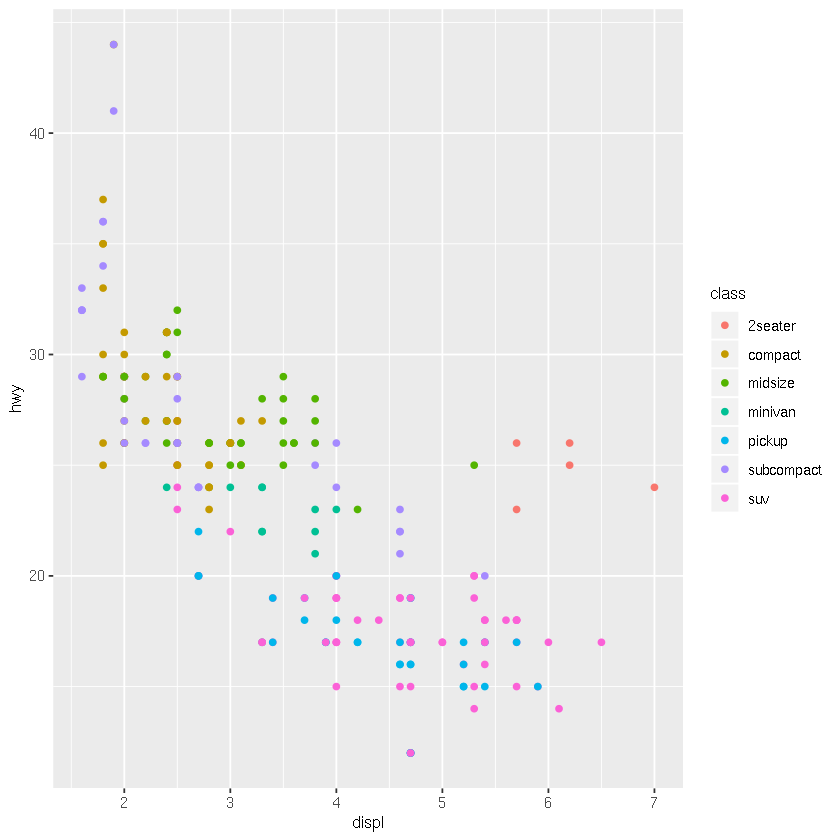

In [32]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy, color = class))

This is the same plot from the plot above, we just indicated the class by color. We already know that there is a negative relationship between fuel efficency and engine size. Now we can also see clusters in the `class` of type of car. These are not hybrid cars, these are 2 seater: sports cars. 


Warning message:
“Using alpha for a discrete variable is not advised.”

Warning message:
“The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them.”Warning message:
“Removed 62 rows containing missing values (geom_point).”

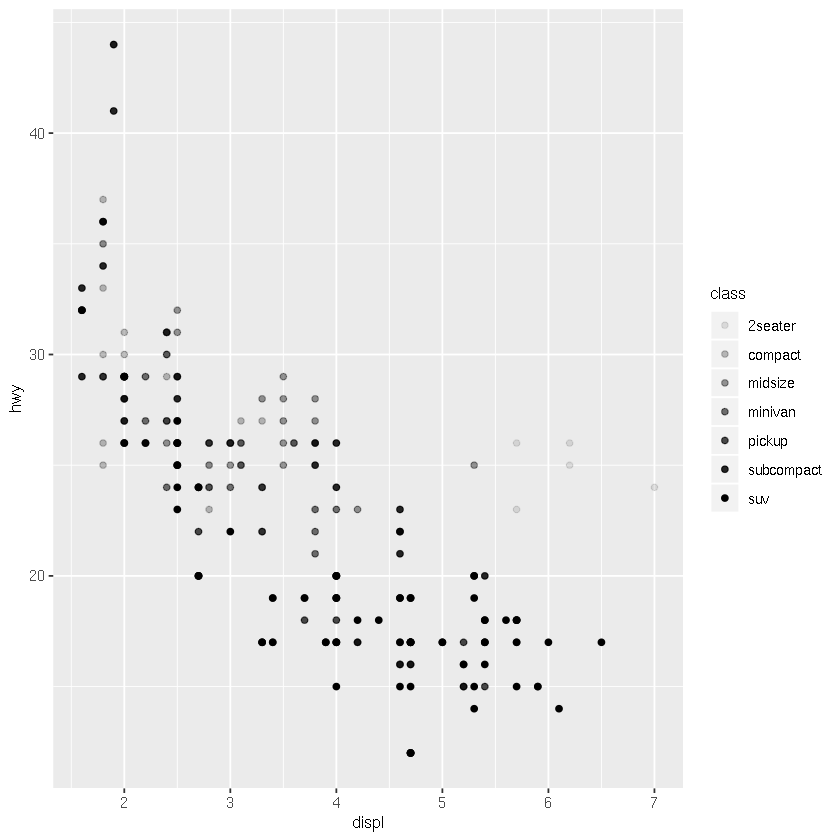

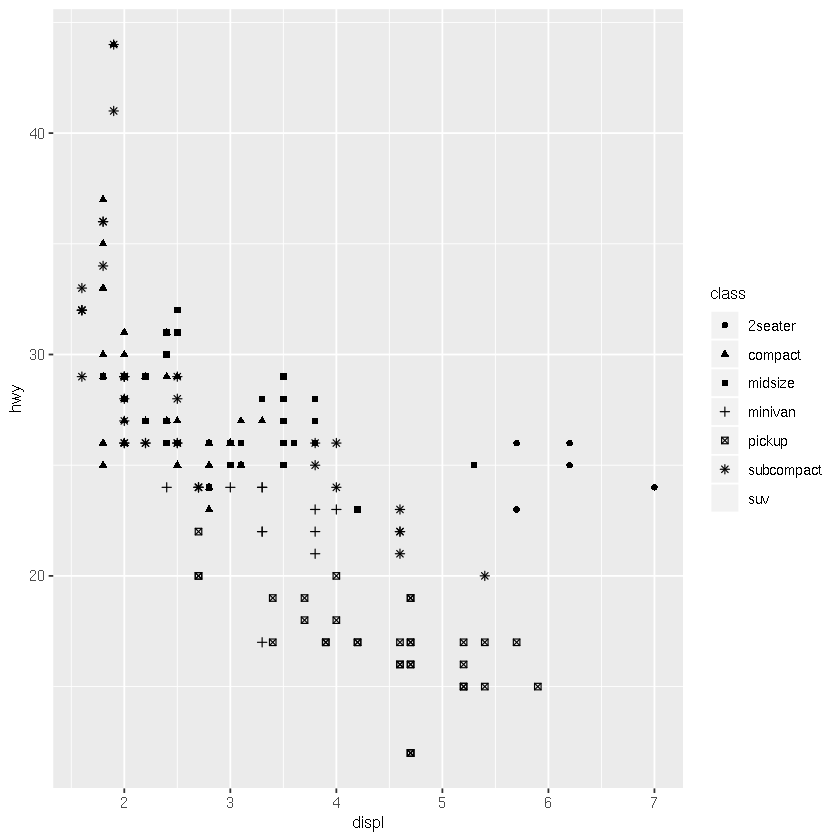

In [33]:
# Left
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

# Right
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


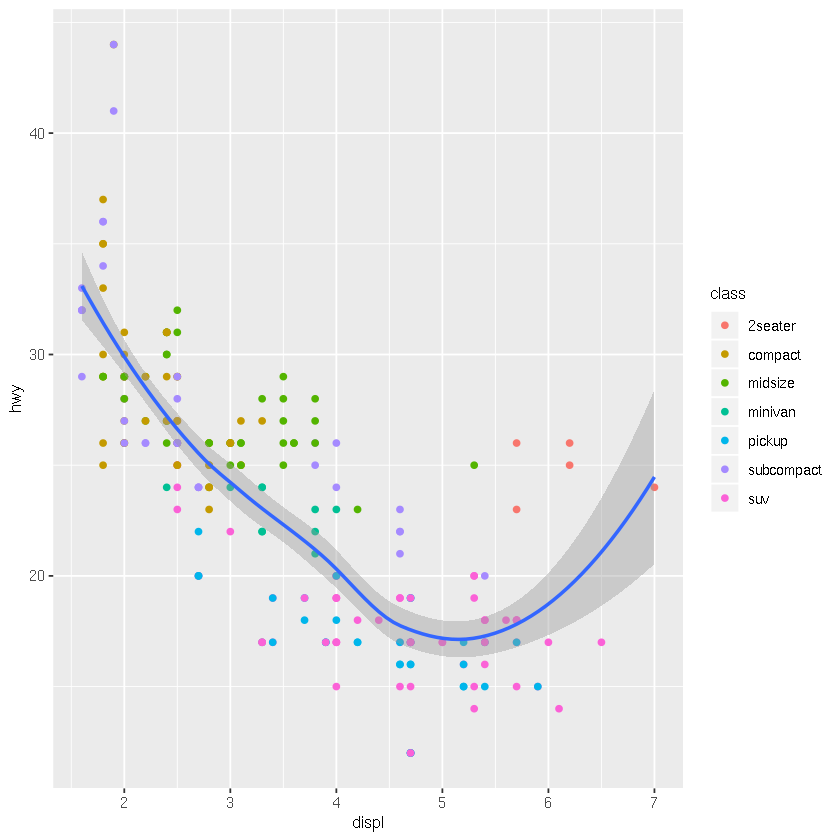

In [34]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth()

smooth line displays just a subset of the mpg dataset, the subcompact cars. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


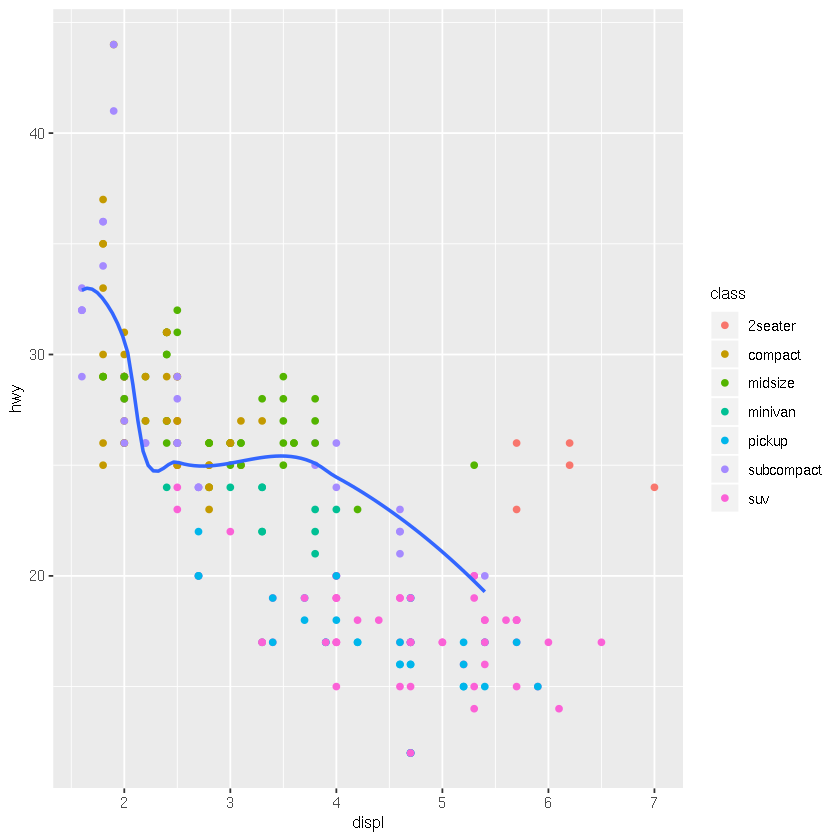

In [35]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth(data = filter(mpg, class == "subcompact"), se = FALSE)